# <center>CS 4331 - Data Mining</center>
## <center>Spring 2020</center>
### <center>Project 1</center>
#### <center>Joshua Ball | Dipendra Yadav</center>

In [1]:
# Importing the libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Reading the data and displaying the first 5 rows
dataset = pd.read_csv("hotel_bookings.csv")
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Problem Understanding Phase


### Problem Objective
    Traveling is expensive overall, but one of the biggest costs associated with a trip is often the lodging.
    Studies have suggested that the best time to buy a plane ticket for lower-price options is 70 days in advance.
    But does the same reasoning apply to hotel rooms?

### Can this problem be solved using Data Science?
    We are using data from https://www.kaggle.com/ekretsch/hotel-booking-dataset to develop a clustering algorithm 
    that can find out the best time of the year to book a hotel room in order to get best prices in the market.

## Data Preparation Phase
    Preparing the data for analysis


In [3]:
# Checking for null values and datatypes of each attributes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [4]:
""" Here we can see that data has int, float and object values. First of all we have to represent the object
    values to some numerical values so that we can perform exploratory data analysis. Also, we have to fix
    the NaN values present in the dataset."""

' Here we can see that data has int, float and object values. First of all we have to represent the object\n    values to some numerical values so that we can perform exploratory data analysis. Also, we have to fix\n    the NaN values present in the dataset.'

In [5]:
# Just a plot function
def plotter():
    plt.figure(figsize=(30, 16))
    sns.set(font_scale=1.4)

In [6]:
# Cleaning the dataset (looking for outliers and NaN values)
data_size = dataset.shape
print('The size of the dataset is {}'.format(data_size))


# Checking for NaNs in the dataset
print('The attributes with NaNs are as follows:')
NaNs = pd.DataFrame(dataset.isnull().sum())
NaNs

The size of the dataset is (119390, 32)
The attributes with NaNs are as follows:


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


    Here we can see there are so many instances in attributes in country, agent, and company that carries NaNs. For this project, country, agent, and company columns do not add up to the value or contribute to the fluctuation in the pricing over the year. Therefore, we are going to drop these two columns. However, We would have needed to do some interpolation to fill in these values in the data preparation phase of data mining in case these attributes were important in the formation of clusters for this project.

In [7]:
dataset = dataset.drop(columns = ['country','agent', 'company','children'])

# Validation of the dataset 
print('The cleaned dataset without NaNs are as follows:')
new_data = pd.DataFrame(dataset.isnull().sum())
new_data

The cleaned dataset without NaNs are as follows:


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [8]:
# Now lets check how the data is distributed statistically
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
# Checking the number of instances in each month to have a general idea of when people travel most
dataset.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

From above data we can see that the months of August followed by July, May, and October has the most travellers.

To use linear regression for modelling,its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.

Text(0.5,1,'Correlation Heatmap')

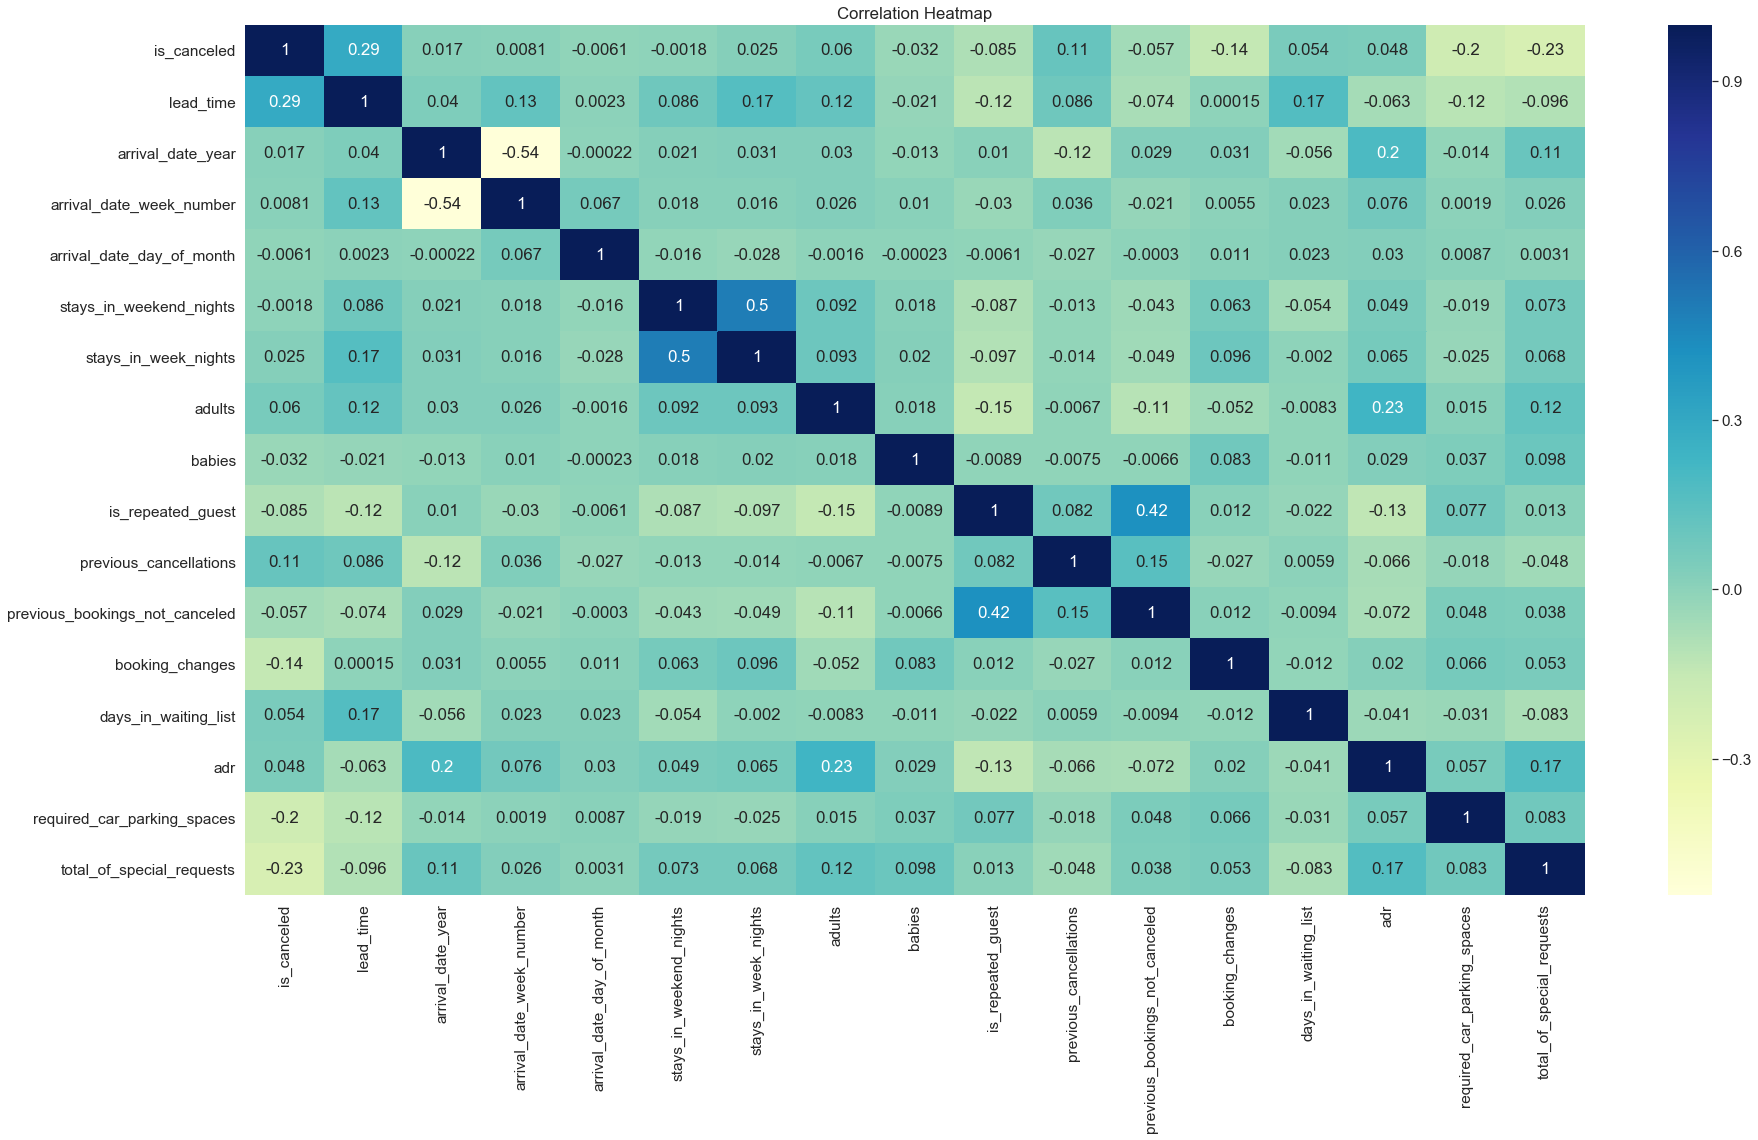

In [10]:
# Representing the data using heatmap before correction
plotter()
data_corr = dataset.corr()
sns.heatmap(data_corr,annot = True,cmap = "YlGnBu")
plt.title('Correlation Heatmap')


In [11]:
#Calculating average rate paid per total stay by multiplying average daily rate * total time stayed
dataset['rate_per_stay'] = dataset['adr'] * (dataset['stays_in_weekend_nights'] + dataset['stays_in_week_nights'])

In [12]:
rate_per_stay = dataset['rate_per_stay']
adr = dataset['adr']
month = dataset['arrival_date_month']
day = dataset['arrival_date_day_of_month']
year = dataset['arrival_date_year']
week = dataset['arrival_date_week_number']



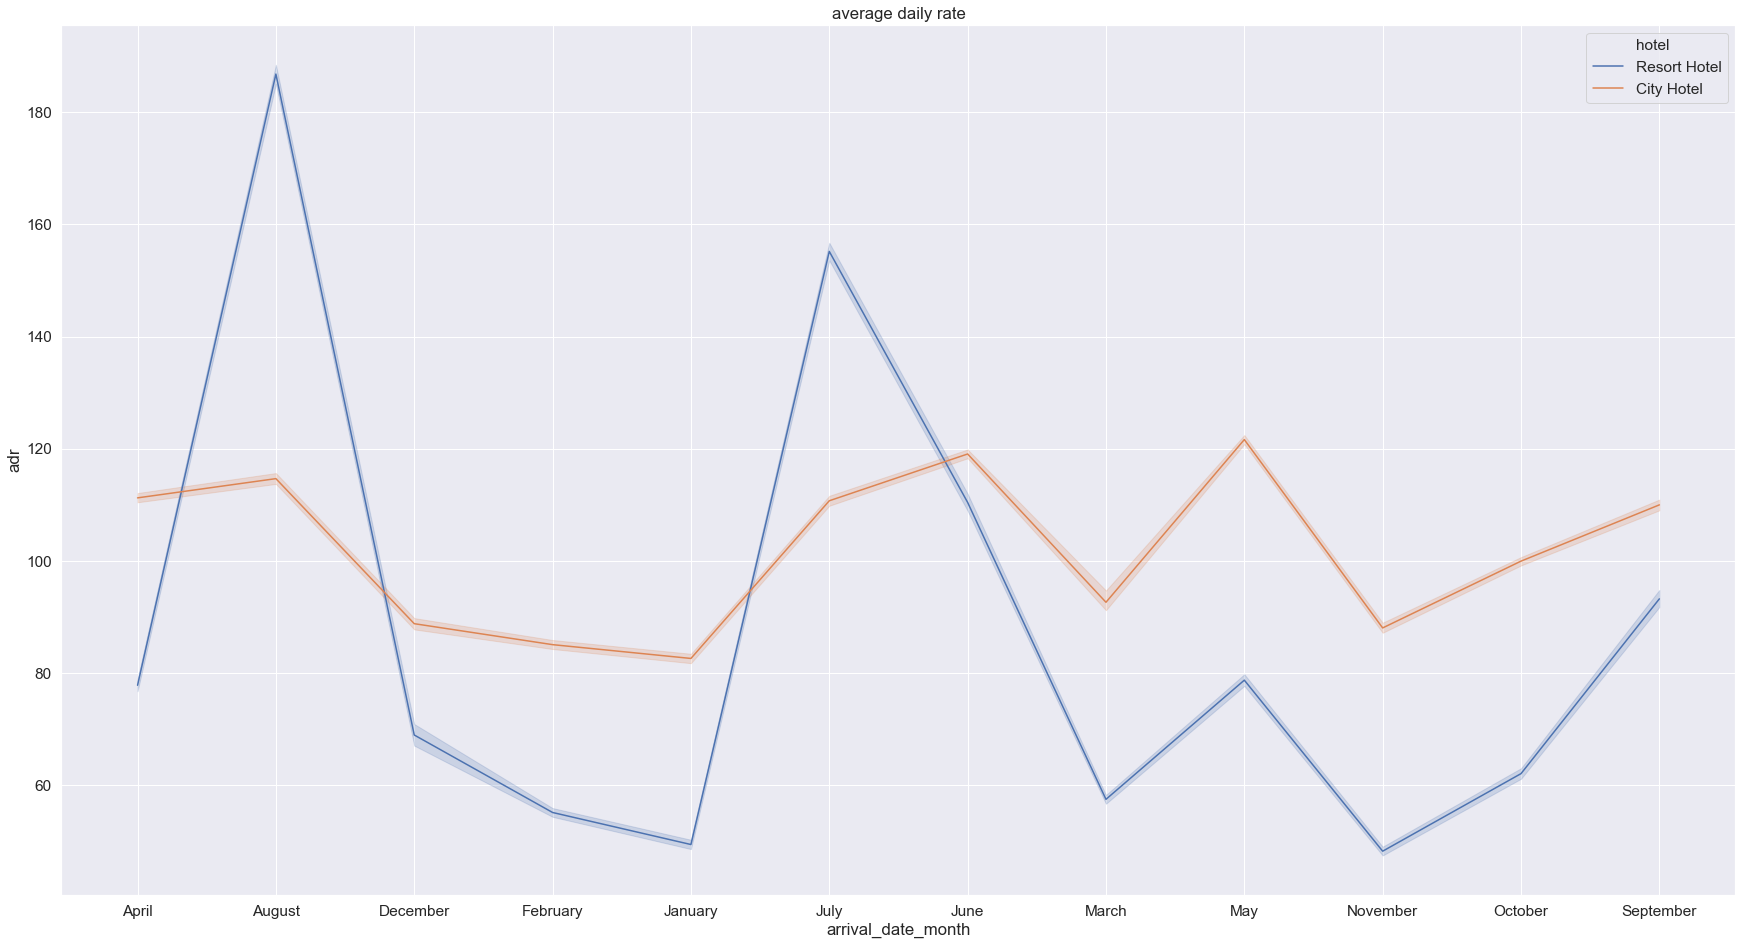

Text(0.5,1,'rate_per_stay')

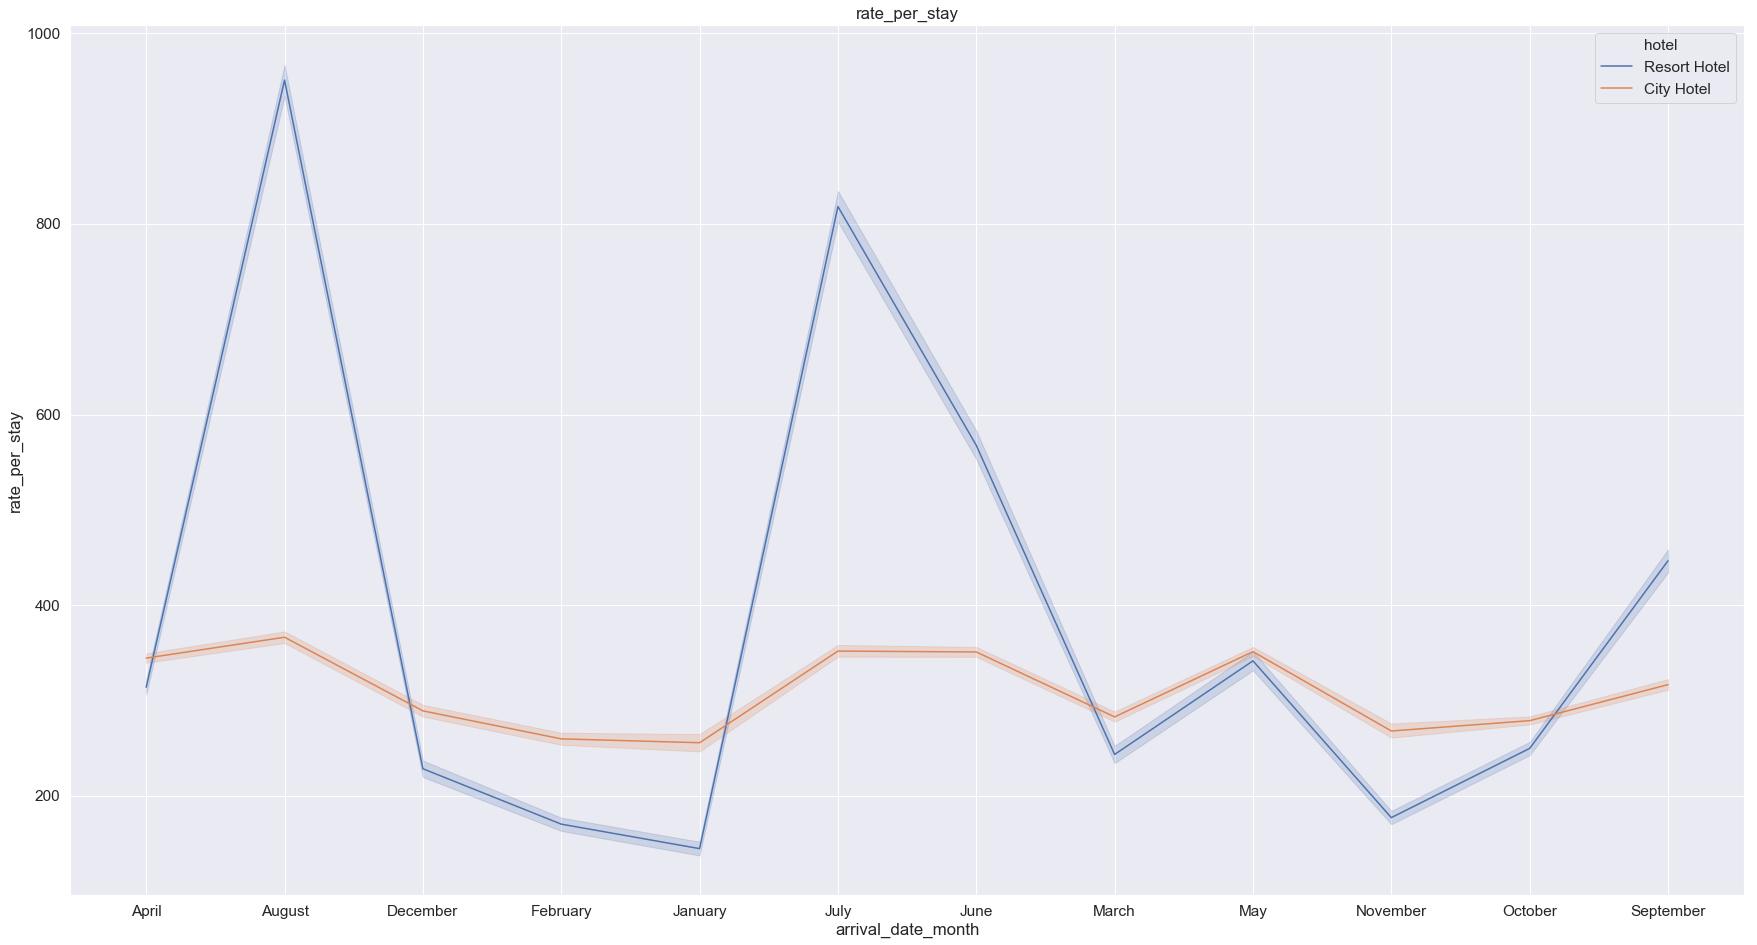

In [13]:
plotter()
sns.lineplot(data = dataset, x = 'arrival_date_month', y = 'adr', hue = 'hotel').set_title("average daily rate")
plt.show()
plotter()
sns.lineplot(data = dataset, x = 'arrival_date_month', y = 'rate_per_stay', hue = 'hotel').set_title("rate_per_stay")    

In [14]:
#Graphs show a clear trend where certian months have a higher overall price paid and adr

In [15]:
#Changing months from str -> int so it is no longer categorical and can be used in clustering model
month_map = {'arrival_date_month':{'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,
             'September':9,'October':10,'November':11,'December':12}}
dataset.replace(month_map,inplace=True)

Text(0.5,1,'Correlation Heatmap after correction')

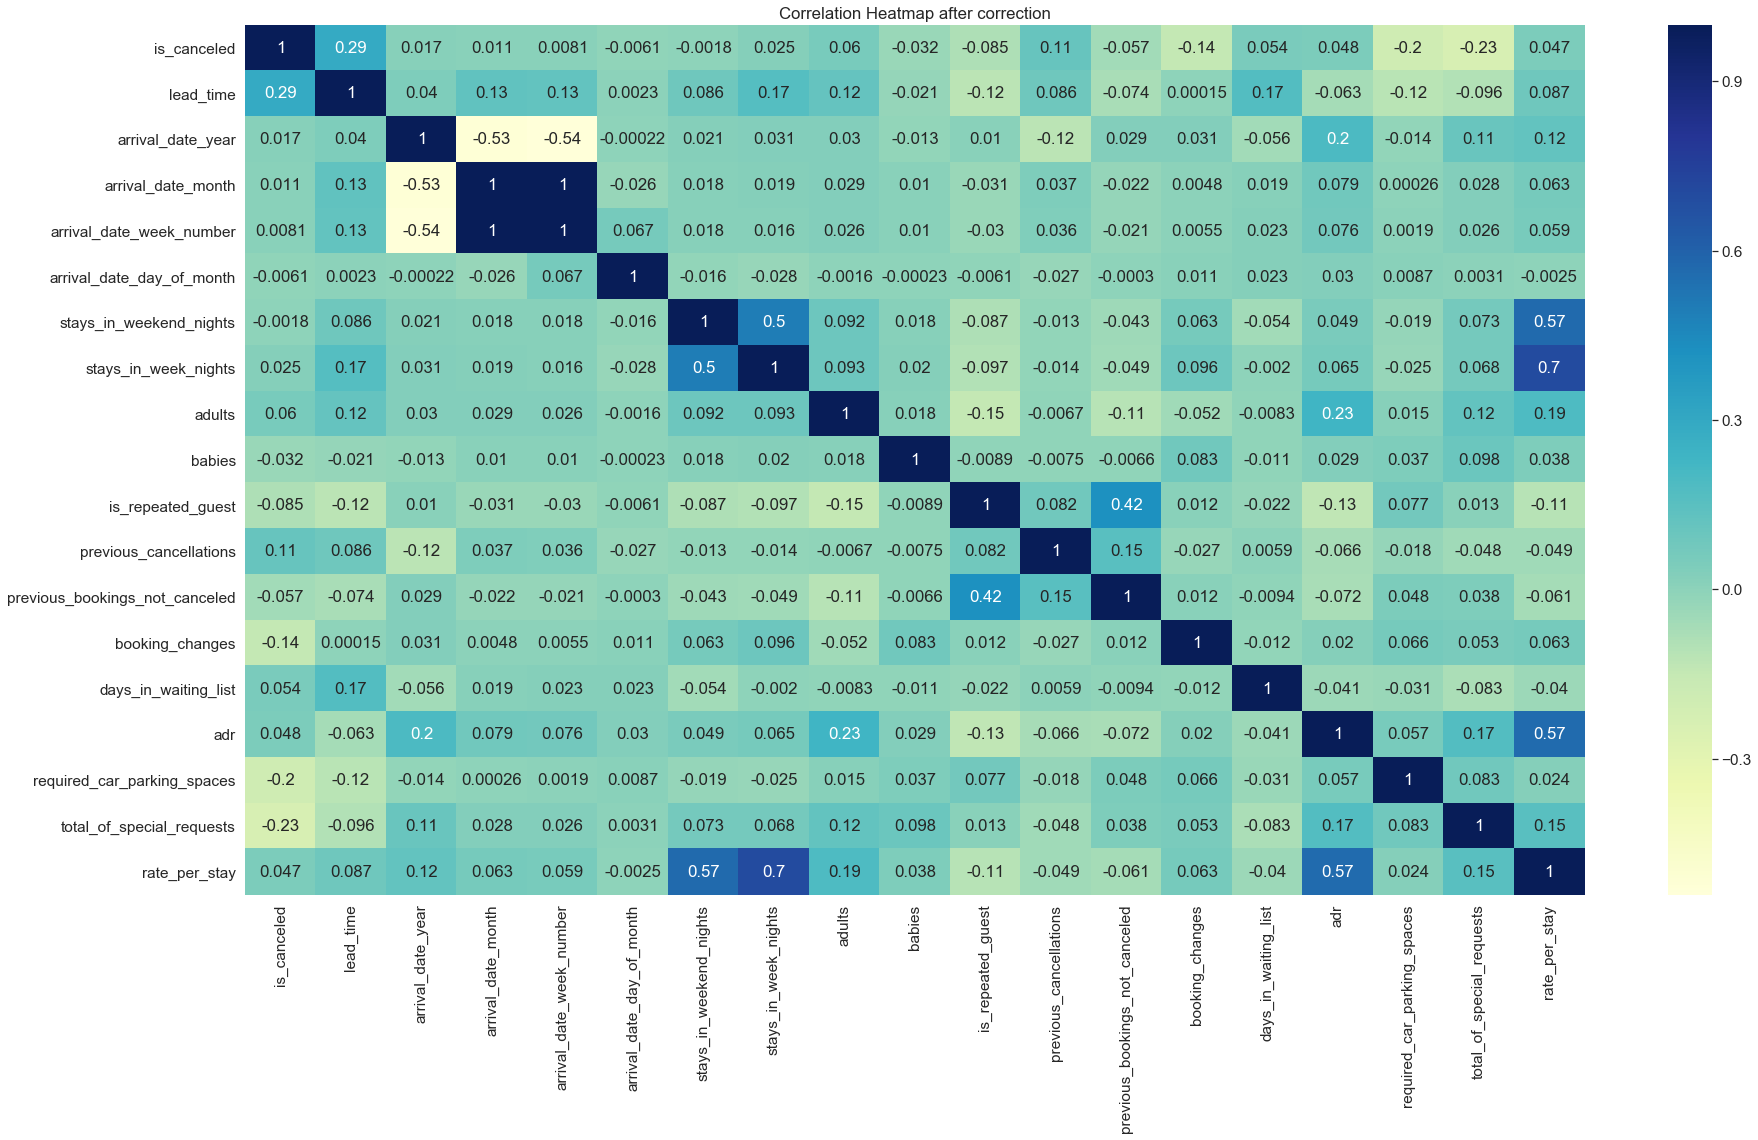

In [16]:
# Representing the data using heatmap after correction
plotter()
data_corr = dataset.corr()
sns.heatmap(data_corr,annot = True,cmap = "YlGnBu")
plt.title('Correlation Heatmap after correction')


        ==> Dark shades represents positive correlation while lighter shades represents negative correlation.
    Here we can infer that “arrival_date_month” has strong positive correlation with “arrival_date_week_number” whereas it has strong negative correlation with “arrival_date_year”. Furthermore,
    if correlation is zero we can infer there is no linear relationship between these two predictors and it is safe to drop these features in case we will be applying Linear Regression model to the dataset.

In [17]:
#Next we are removing cases where the customer canceled their reservations
dataset.loc[dataset['is_canceled'] == 1] = np.NaN #Replace row with NaN if it was canceled
dataset = dataset.dropna(); #Remove NaN rows
dataset.reset_index(drop=True);

Text(0.5,1,'Cleaned rate per stay')

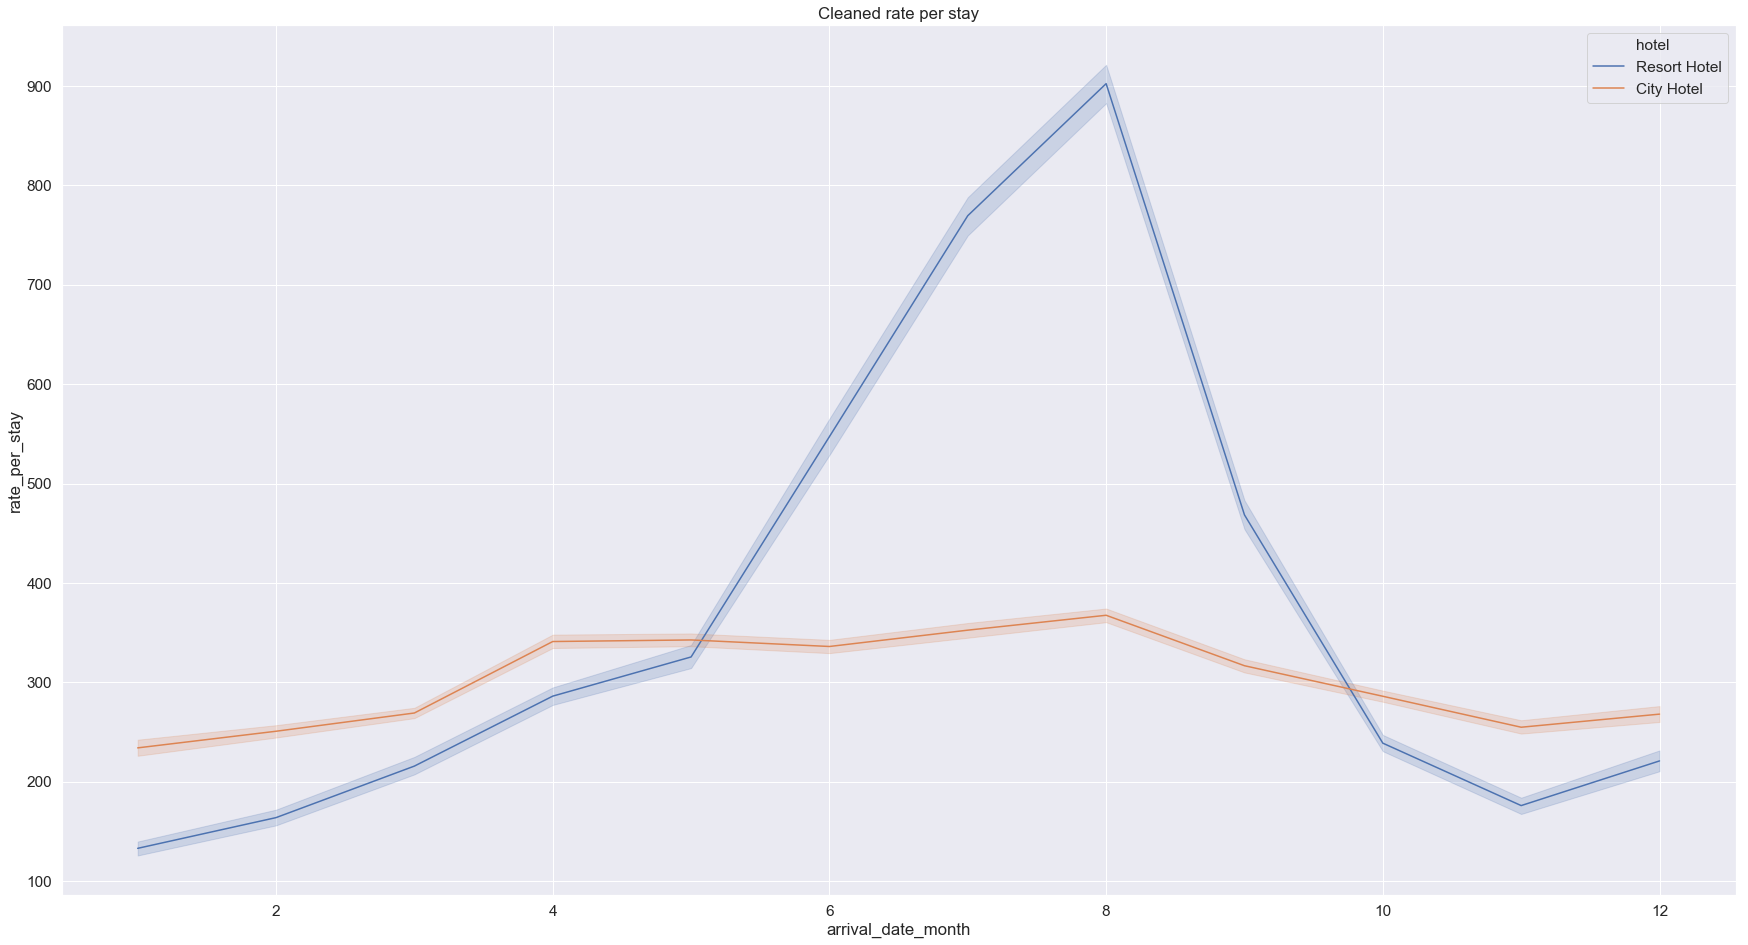

In [18]:
plt.figure(figsize=(30, 16))
sns.set(font_scale=1.4)
sns.lineplot(data = dataset, x = 'arrival_date_month', y = 'rate_per_stay', hue = 'hotel').set_title("Cleaned rate per stay")    
#Huge peak in summer months, which is to be expected.

In [19]:
def bar_plotter(x):
    sns.set(style="whitegrid")
    plt.figure(figsize=(30, 16))
    sns.set(font_scale=1.4)
    ax = sns.barplot(x, adr)

Text(0.5,1,'Average Daily Rates vs Day of the Month')

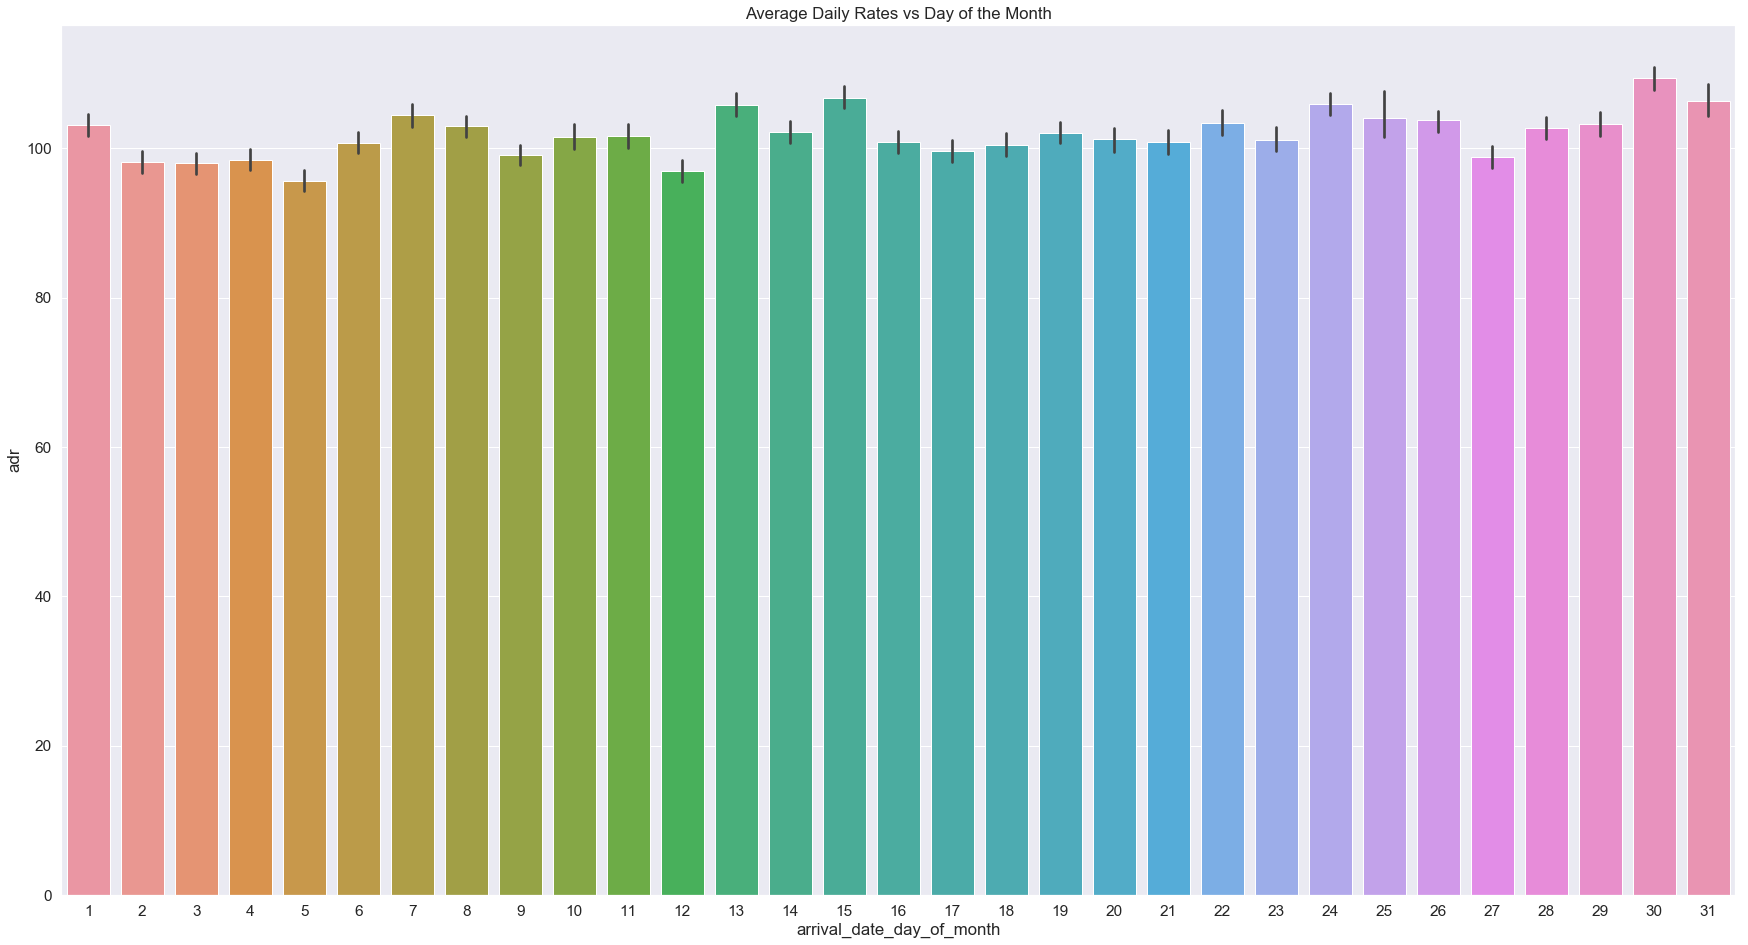

In [20]:
# Plotting the rate_per_stay with respect to days
bar_plotter(day)
plt.title('Average Daily Rates vs Day of the Month')


Text(0.5,1,'Average Daily Rates vs Weeks of the Year')

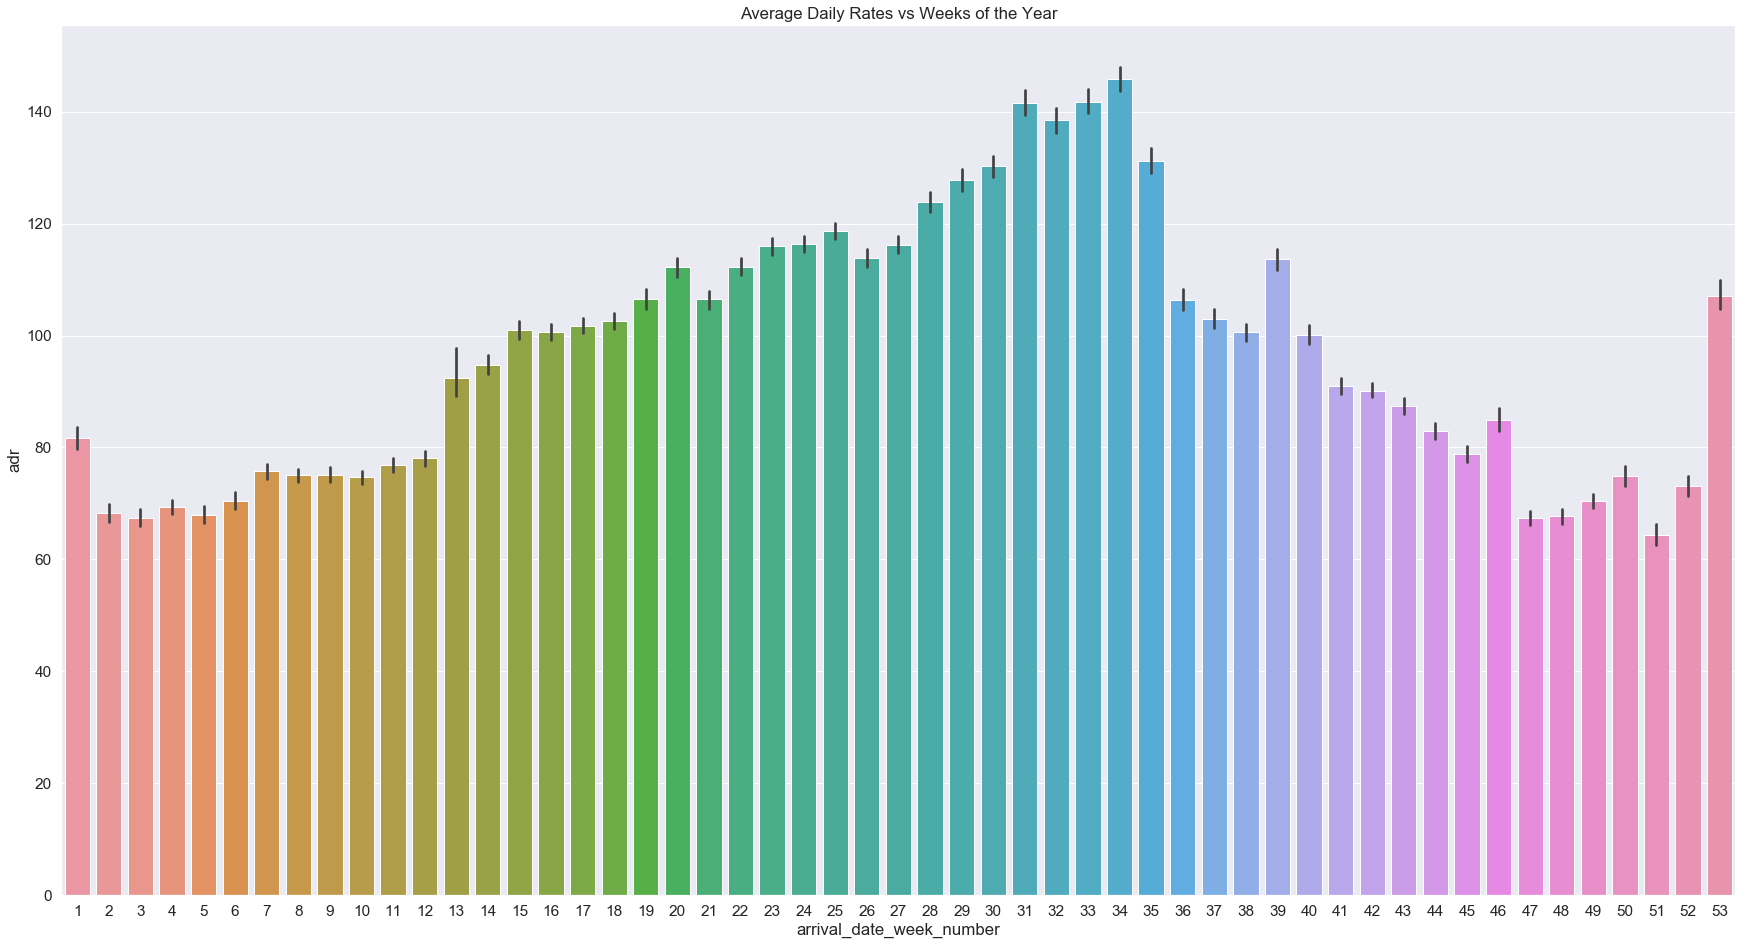

In [21]:
# Plotting the rate_per_stay with respect to weeks
bar_plotter(week)
plt.title('Average Daily Rates vs Weeks of the Year')

Text(0.5,1,'Average Daily Rates vs Months of the Year')

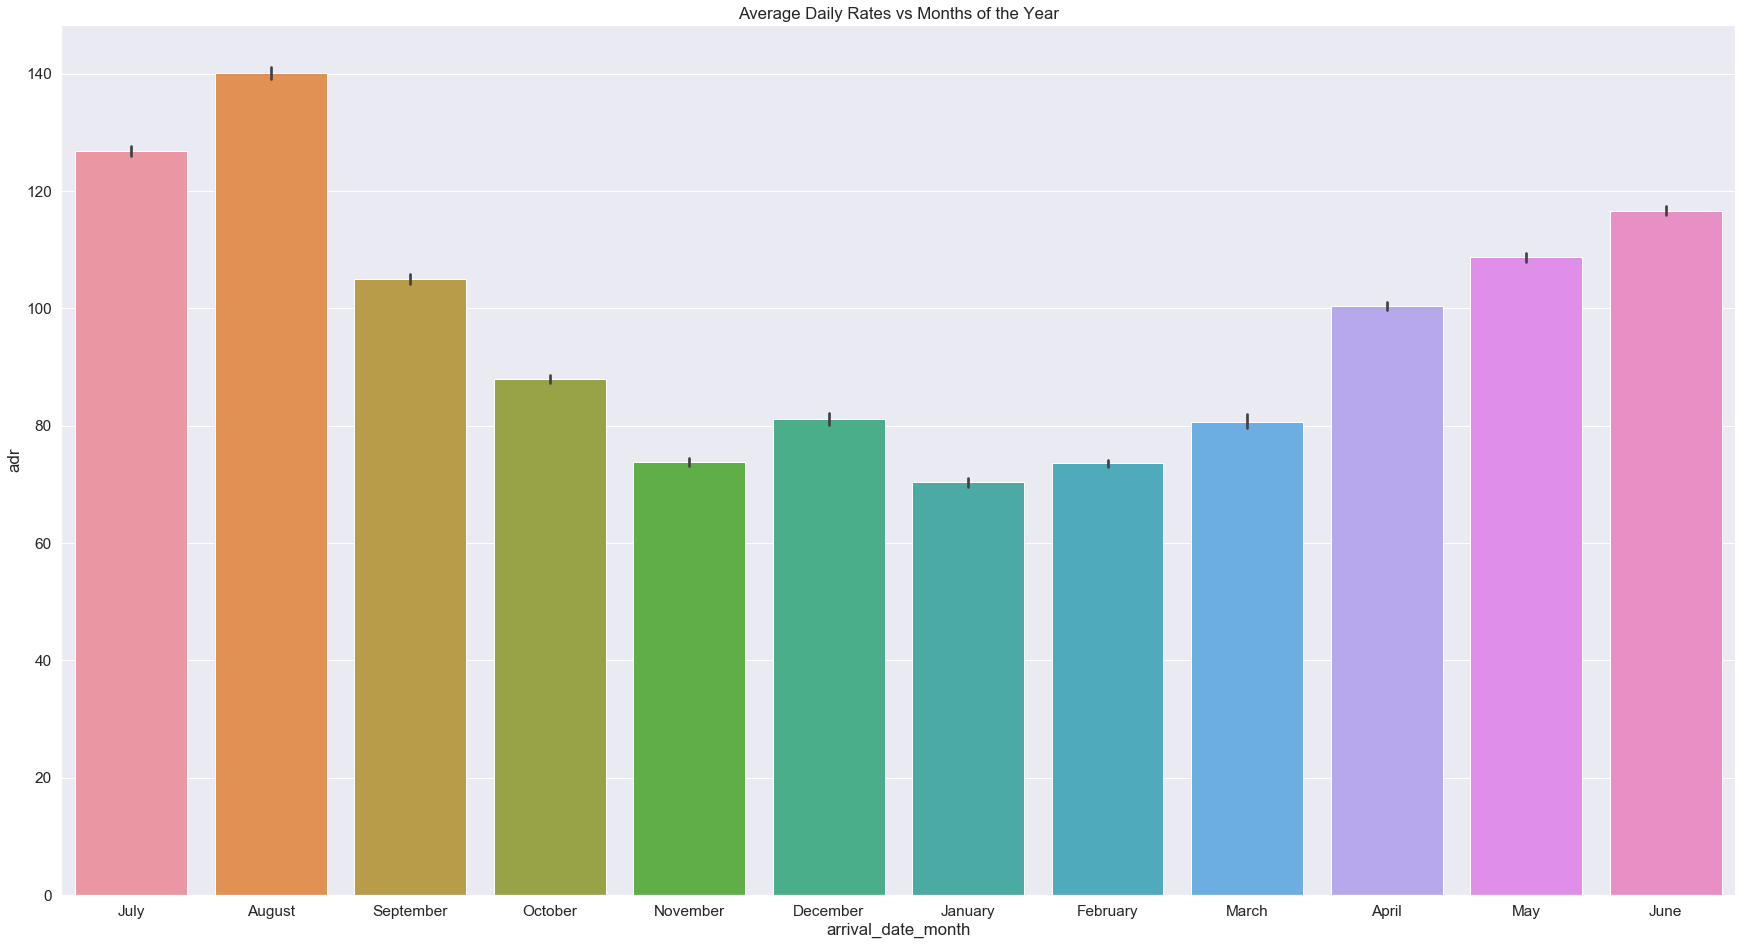

In [22]:
# Plotting the rate_per_stay with respect to months
bar_plotter(month)
plt.title('Average Daily Rates vs Months of the Year')


Text(0.5,1,'Average Daily Rates vs Years')

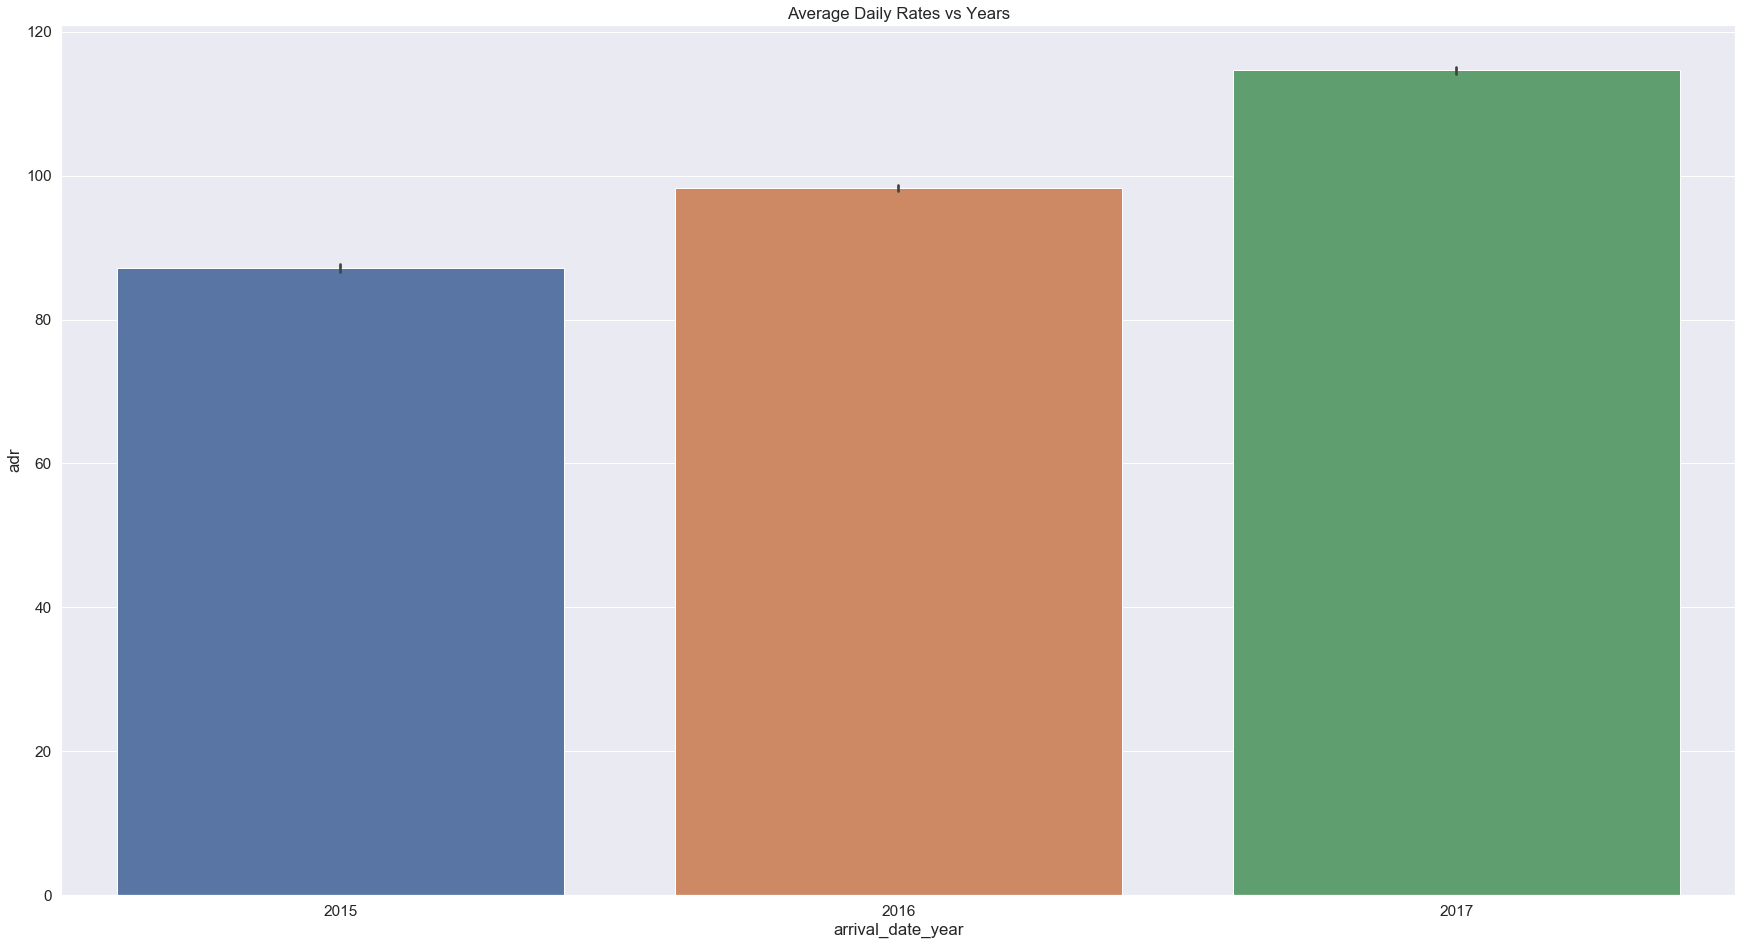

In [23]:
# Plotting the rate_per_stay with respect to years
bar_plotter(year)
plt.title('Average Daily Rates vs Years')

In [24]:
# To know the acutal visitor numbers, only bookings that were not canceled are included. 
resort_hotel = dataset.loc[(dataset["hotel"] == "Resort Hotel") & (dataset["is_canceled"] == 0)]
city_hotel = dataset.loc[(dataset["hotel"] == "City Hotel") & (dataset["is_canceled"] == 0)]

In [25]:
resort_guests_monthly = resort_hotel.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city_hotel.groupby("arrival_date_month")["hotel"].count()

In [26]:
# finding the number of guests per month in each hotel type
resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

Text(0.5,1,'Guests per Month')

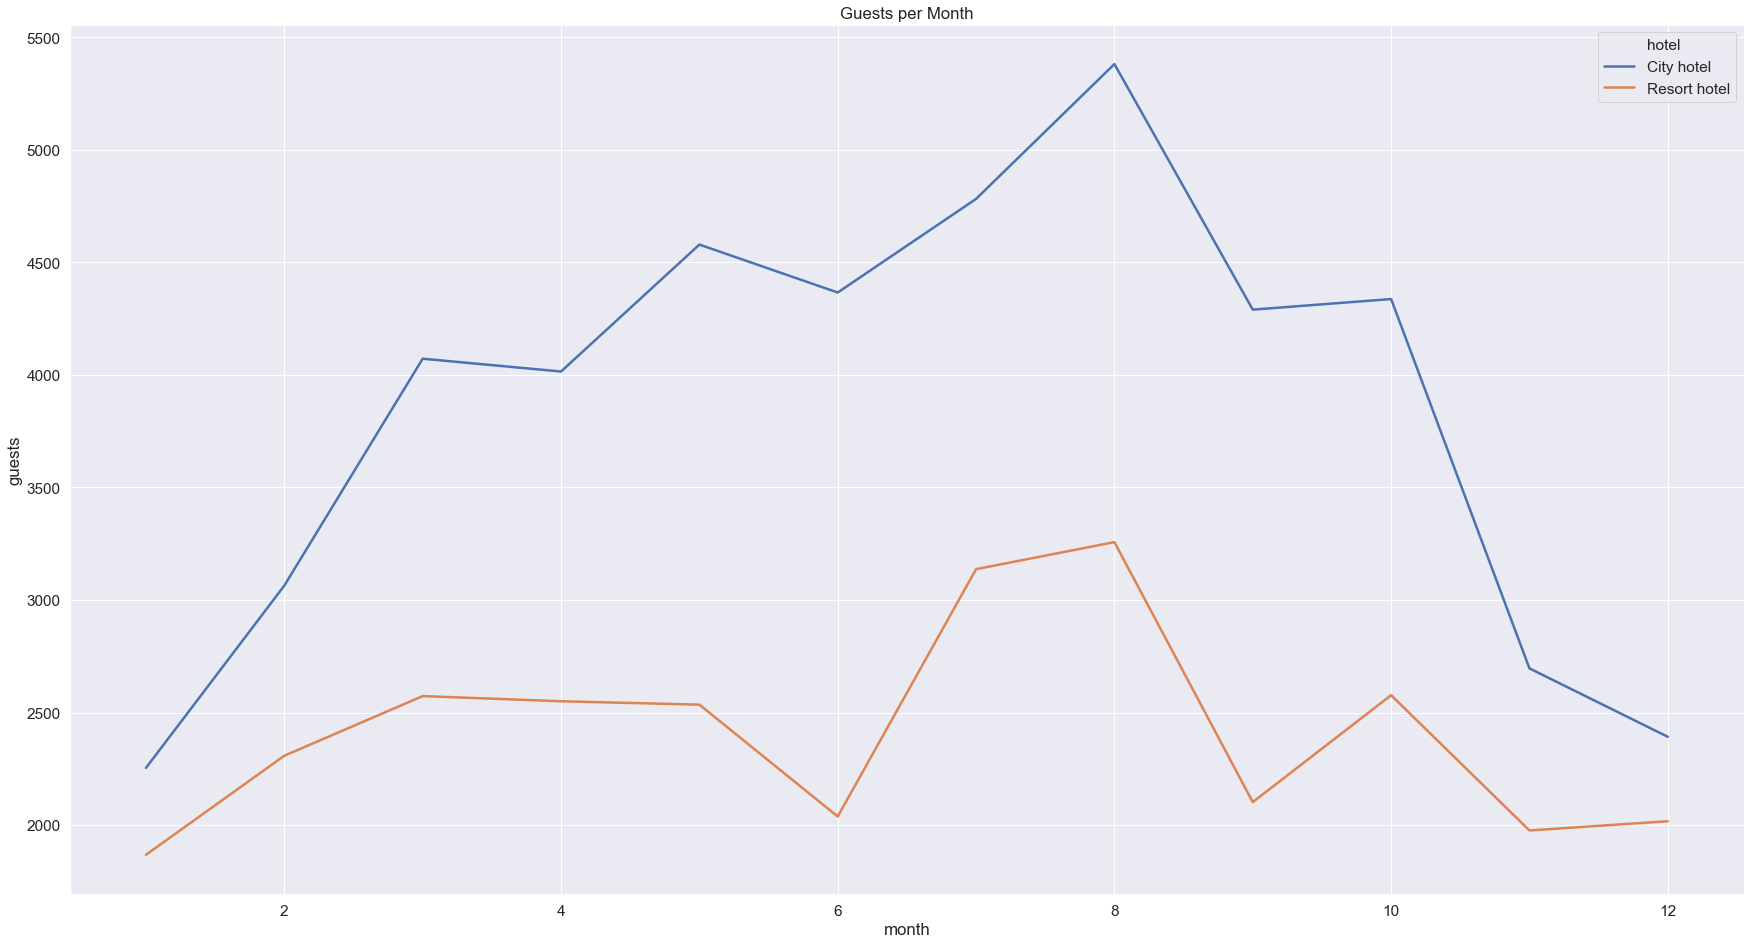

In [27]:
# Plotting the data above to visualize the distribution
plotter()
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title('Guests per Month')

Text(0.5,1,'Guests per month')

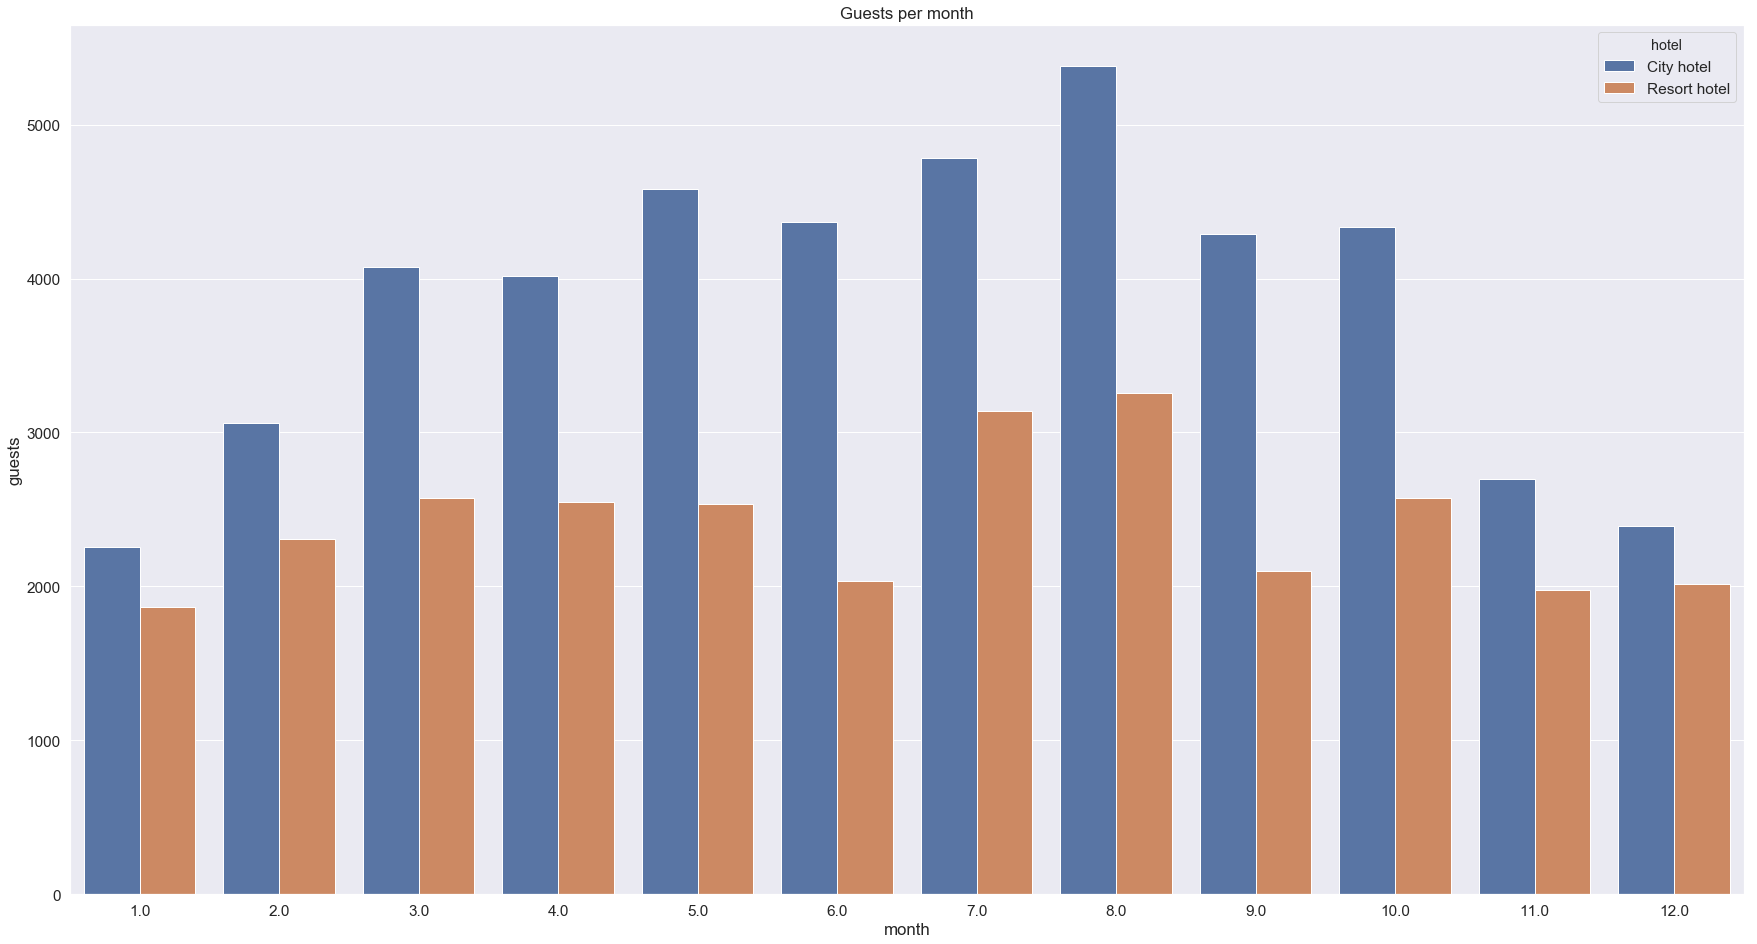

In [28]:
# bar plot of the distribution
plotter()
sns.barplot(x = "month", y="guests", hue="hotel", data=full_guest_data,  hue_order = ["City hotel", "Resort hotel"])
plt.title('Guests per month')

   ### Observation
   From above it can be observed that the prices are higher (over 100/room) during months April to September but still more people travel during these months as the number of guests in City Hotels is over 2000 per months. The prices are lower in the winter months of October through March (less than 100) when the number of travelers decrease. Therefore, as expected we can say that the price of a hotel room is directly proportional to the number of guests. The prices of hotels increase as the demand increases. 
   
   ### Result:
   In order to get cheap prices on hotels, it will be beneficial to make trips during the winter months.
    
    

## Testing the data with linear regression (just for fun)

In [29]:
import statsmodels.api as sm
from sklearn import metrics as met

In [30]:
X = pd.DataFrame(dataset[['lead_time','arrival_date_year','arrival_date_month',
                         'arrival_date_week_number','stays_in_weekend_nights',
                        'days_in_waiting_list']])
y = pd.DataFrame(dataset['adr'])

In [31]:
X = sm.add_constant(X)

In [32]:
X

,const,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,days_in_waiting_list
0,1.0,342.0,2015.0,7.0,27.0,0.0,0.0
1,1.0,737.0,2015.0,7.0,27.0,0.0,0.0
2,1.0,7.0,2015.0,7.0,27.0,0.0,0.0
3,1.0,13.0,2015.0,7.0,27.0,0.0,0.0
4,1.0,14.0,2015.0,7.0,27.0,0.0,0.0
5,1.0,14.0,2015.0,7.0,27.0,0.0,0.0
6,1.0,0.0,2015.0,7.0,27.0,0.0,0.0
7,1.0,9.0,2015.0,7.0,27.0,0.0,0.0
11,1.0,35.0,2015.0,7.0,27.0,0.0,0.0
12,1.0,68.0,2015.0,7.0,27.0,0.0,0.0


In [33]:
model01 = sm.OLS(y,X).fit()

In [34]:
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    adr   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1149.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:11:50   Log-Likelihood:            -3.9621e+05
No. Observations:               75166   AIC:                         7.924e+05
Df Residuals:                   75159   BIC:                         7.925e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.552e+04    604.620    -75.288      0.000   -4.67e+04   -4.43e+04
lead_time                   -0.0271      0.002    -13.445      0.000      -0.031      -0.023
arrival_date_year           22.6140      0.300     75.430      0.000      22.026      23.202
arrival_date_month           2.8369      0.569      4.986      0.000       1.722       3.952
arrival_date_week_number     0.3500      0.130      2.688      0.007       0.095       0.605
stays_in_weekend_nights      1.7655      0.177      9.974      0.000       1.419       2.112
days_in_waiting_list        -0.0510      0.012     -4.288      0.000      -0.074      -0.028
==============================================================================
Omnibus:                     9688.799   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19660.300
Skew:                           0.808   Prob(JB):                         0.00
Kurtosis:                       4.915   Cond. No.                     7.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Stage 2

In [35]:
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
import random

In [36]:
#Create test and train partitions
data_train, data_test = train_test_split(dataset, test_size = 0.25, random_state = 7)

In [37]:
#Checking the shapes of our parititons
data_train.shape

(56374, 29)

In [38]:
data_test.shape

(18792, 29)

In [39]:
#Checking the mean of imporant numerical variables in our dataset in the 2 respective partitions
data_train['adr'].mean()

99.92659044949674

In [40]:
data_test['adr'].mean()

100.17099404001706

In [41]:
data_train['rate_per_stay'].mean()

345.2389757689718

In [42]:
data_test['rate_per_stay'].mean()

347.68829235844913

The paritions look good so far. Lets represent them again graphically based on the number of guests per month like we did above.

In [43]:
resort_hotel_train = data_train.loc[(data_train["hotel"] == "Resort Hotel") & (data_train["is_canceled"] == 0)]
city_hotel_train = data_train.loc[(data_train["hotel"] == "City Hotel") & (data_train["is_canceled"] == 0)]

In [44]:
resort_guests_monthly_train = resort_hotel_train.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly_train = city_hotel_train.groupby("arrival_date_month")["hotel"].count()

In [45]:
resort_guest_data_train = pd.DataFrame({"month": list(resort_guests_monthly_train.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly_train.values)})

city_guest_data_train = pd.DataFrame({"month": list(city_guests_monthly_train.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly_train.values)})
full_guest_data_train = pd.concat([resort_guest_data_train,city_guest_data_train], ignore_index=True)

Text(0.5,1,'Guests per month in training set')

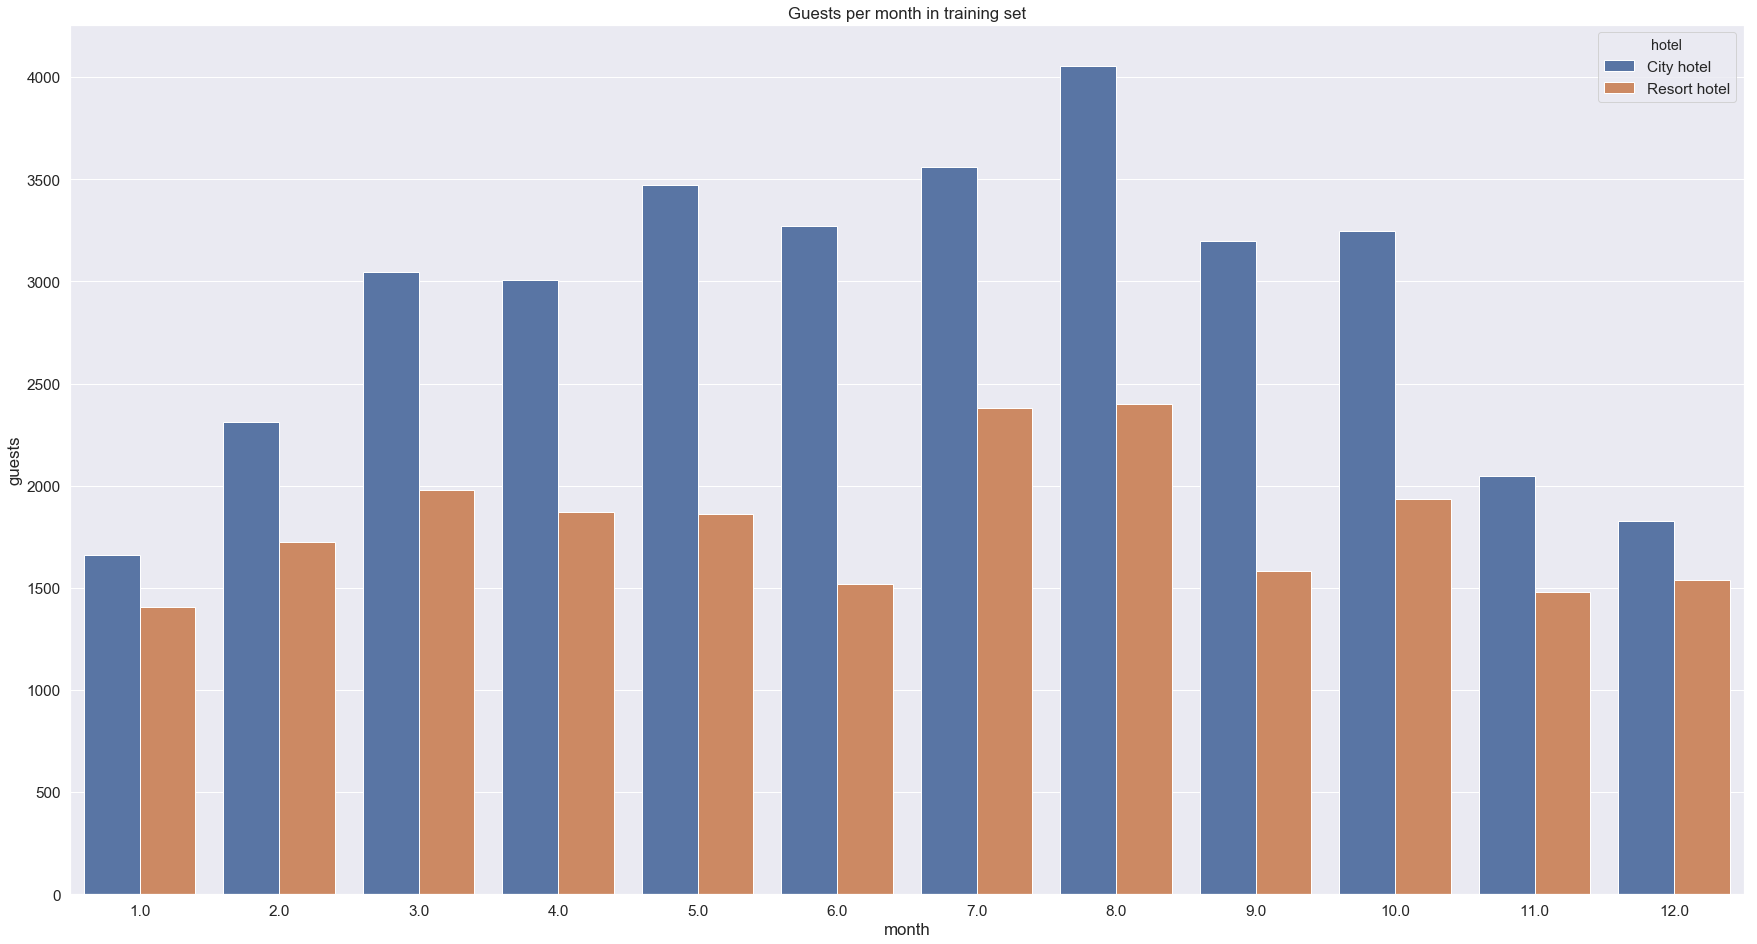

In [46]:
plotter()
sns.barplot(x = "month", y="guests", hue="hotel", data=full_guest_data_train,  hue_order = ["City hotel", "Resort hotel"])
plt.title('Guests per month in training set')

In [47]:
resort_hotel_test = data_test.loc[(data_test["hotel"] == "Resort Hotel") & (data_test["is_canceled"] == 0)]
city_hotel_test  = data_test.loc[(data_test["hotel"] == "City Hotel") & (data_test["is_canceled"] == 0)]

In [48]:
resort_guests_monthly_test = resort_hotel_test.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly_test = city_hotel_test.groupby("arrival_date_month")["hotel"].count()

In [49]:
resort_guest_data_test = pd.DataFrame({"month": list(resort_guests_monthly_test.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly_test.values)})

city_guest_data_test = pd.DataFrame({"month": list(city_guests_monthly_test.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly_test.values)})
full_guest_data_test = pd.concat([resort_guests_monthly_test,city_guests_monthly_test], ignore_index=True)

Text(0.5,1,'Guests per month in testing set')

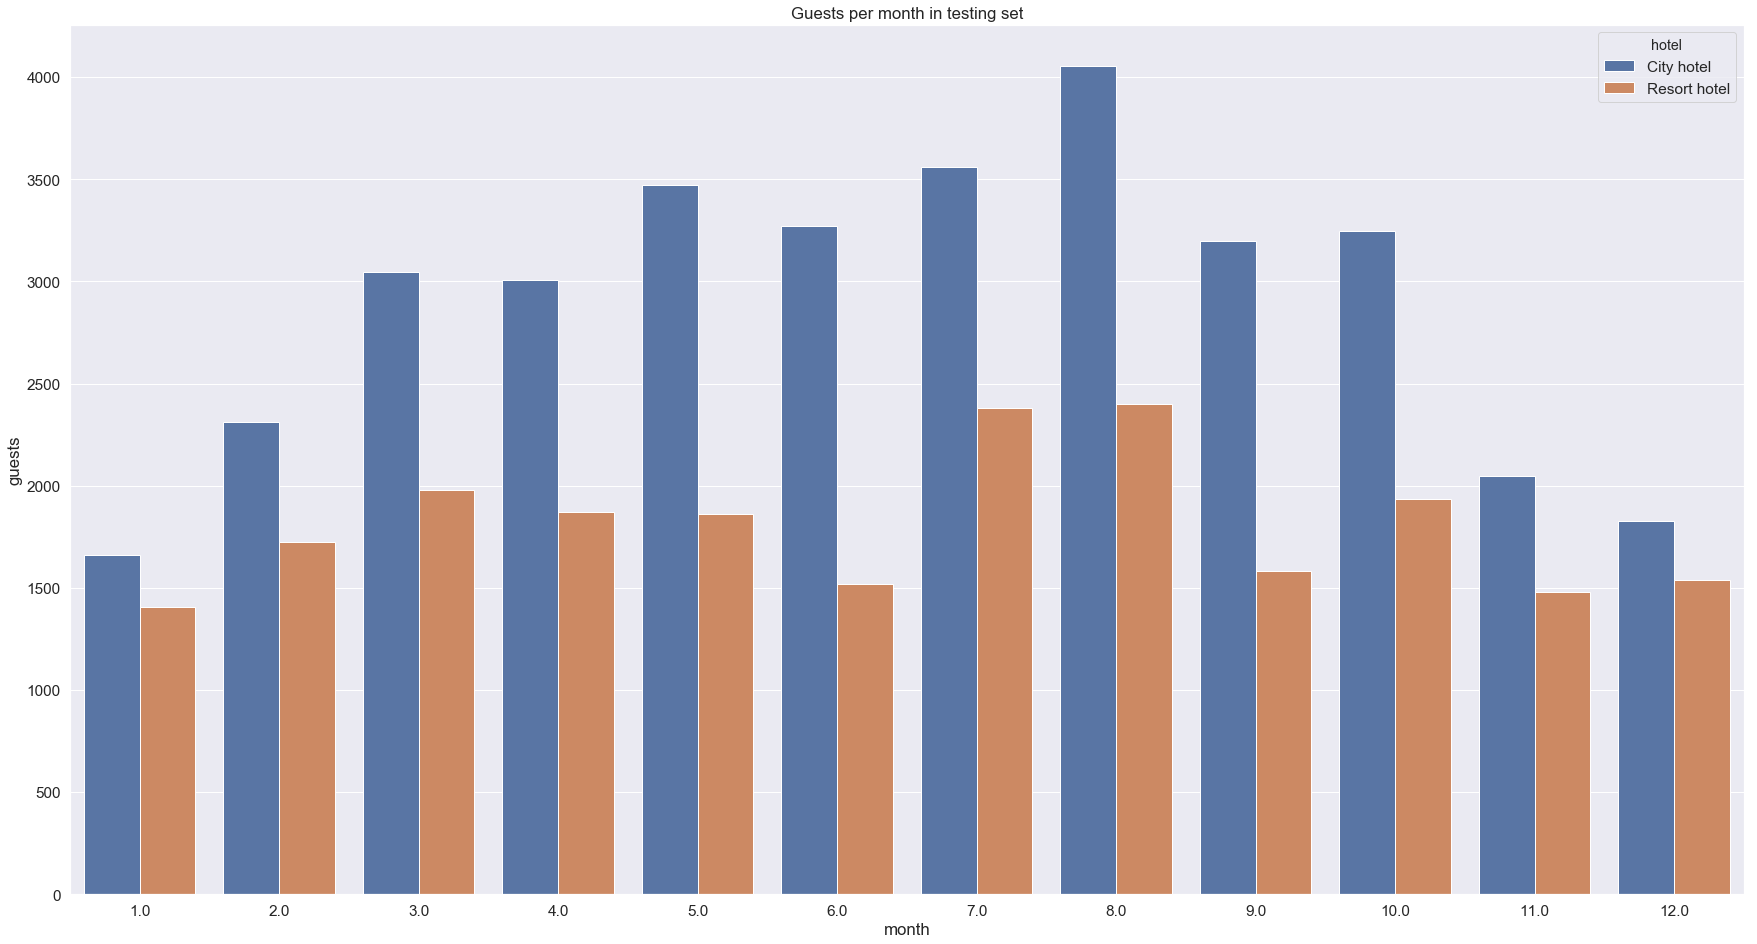

In [50]:
plotter()
sns.barplot(x = "month", y="guests", hue="hotel", data=full_guest_data_train,  hue_order = ["City hotel", "Resort hotel"])
plt.title('Guests per month in testing set')

It is clear from the two graphs that the partitions are very similar to each other and contain similar splits of variables needed to cluster the data.

In [51]:
#Takes any numerical variable, 'RATE' and data set
def clusterMonth(RATE,data_set):
    X_month = data_set[[RATE,'arrival_date_month']]
    Xz_month = pd.DataFrame(stats.zscore(X_month),columns=[RATE,'arrival_date_month'])
    kmeans_month = KMeans(n_clusters=2).fit(Xz_month)
    cluster_month = kmeans_month.labels_
    Cluster1_month = Xz_month.loc[cluster_month  == 0]
    Cluster2_month = Xz_month.loc[cluster_month  == 1]
    print(Cluster1_month.describe())
    print(Cluster2_month.describe())
    return Cluster1_month, Cluster2_month

In [52]:
#K-means clusering model generation on testing set
cluster_test = clusterMonth('rate_per_stay',data_test)

       rate_per_stay  arrival_date_month
count   10377.000000        10377.000000
mean        0.236278            0.756498
std         1.200331            0.570655
min        -1.062802           -1.752630
25%        -0.549265            0.157611
50%        -0.131222            0.794358
75%         0.623616            1.112732
max        22.138066            1.749478
       rate_per_stay  arrival_date_month
count    8415.000000         8415.000000
mean       -0.291367           -0.932879
std         0.550365            0.505633
min        -1.062802           -1.752630
25%        -0.726558           -1.434256
50%        -0.375488           -0.797509
75%         0.002206           -0.479136
max         4.252306            0.157611


In [53]:
#K-means clusering model generation on training set
cluster_train = clusterMonth('rate_per_stay',data_train)

       rate_per_stay  arrival_date_month
count   25667.000000        25667.000000
mean       -0.298281           -0.916856
std         0.557132            0.515217
min        -1.272668           -1.752400
25%        -0.738136           -1.435710
50%        -0.393273           -0.802331
75%         0.008591           -0.485641
max         4.627718            0.147739
       rate_per_stay  arrival_date_month
count   30707.000000        30707.000000
mean        0.249323            0.766370
std         1.199977            0.569239
min        -1.074163           -1.435710
25%        -0.545232            0.464429
50%        -0.114619            0.781118
75%         0.658243            1.097808
max        19.554165            1.731188


In [54]:
#Validate cluser results with t-test, other tests if needed

In [55]:
ttest_ind(cluster_train[0].mean(),cluster_test[0].mean())

Ttest_indResult(statistic=-2.7317282770882647, pvalue=0.1119483246231868)

In [56]:
ttest_ind(cluster_train[1].mean(),cluster_test[1].mean())

Ttest_indResult(statistic=2.7185758500968498, pvalue=0.11285722505661262)

Result from the T-test are as expected, with very small p_values showing that the correlation is fairly strong as expected.

Now lets generate another set of models with using the variable 'adr' and 'arrival_date_month'

In [57]:
cluster_train_adr = clusterMonth('adr',data_train)

                adr  arrival_date_month
count  33440.000000        33440.000000
mean       0.297179            0.676783
std        1.081953            0.624835
min       -2.026412           -1.435710
25%       -0.471621            0.147739
50%        0.179944            0.781118
75%        0.893765            1.097808
max        8.315882            1.731188
                adr  arrival_date_month
count  22934.000000        22934.000000
mean      -0.433316           -0.986815
std        0.659355            0.497184
min       -2.155792           -1.752400
25%       -0.829951           -1.435710
50%       -0.420315           -1.119020
75%       -0.039069           -0.485641
max        2.759434            0.464429


In [58]:
cluster_test_adr = clusterMonth('adr',data_test)

               adr  arrival_date_month
count  7679.000000         7679.000000
mean     -0.420950           -0.988144
std       0.665361            0.494340
min      -2.049086           -1.752630
25%      -0.821733           -1.434256
50%      -0.412615           -1.115883
75%      -0.037761           -0.479136
max       2.614855            0.475985
                adr  arrival_date_month
count  11113.000000        11113.000000
mean       0.290874            0.682800
std        1.085441            0.617470
min       -2.049086           -1.752630
25%       -0.484211            0.157611
50%        0.166286            0.475985
75%        0.886333            1.112732
max        5.887796            1.749478


In [59]:
ttest_ind(cluster_train_adr[0].mean(),cluster_test_adr[0].mean())

Ttest_indResult(statistic=3.4916552056713774, pvalue=0.07313856466641472)

In [60]:
ttest_ind(cluster_train_adr[1].mean(),cluster_test_adr[1].mean())

Ttest_indResult(statistic=-3.5295988860698237, pvalue=0.07173875768535228)

To note, running 'adr' and 'arrival_date_month' results in a p_value of 0.0731 vs a p_value of 0.1119, so we can see that using 'adr' gives better performance statistically. 